In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
dataFrame=pd.read_csv("weatherHistory.csv")

In [6]:
dataFrame.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


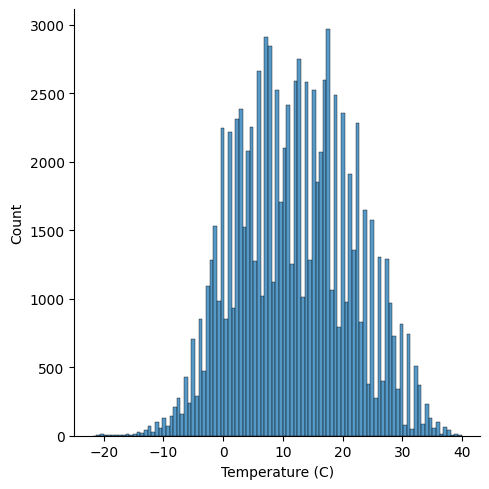

In [10]:
sb.displot(dataFrame["Temperature (C)"])

In [11]:
dataFrame.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [13]:
data = dataFrame[["Temperature (C)","Humidity","Wind Speed (km/h)"]]
data = data.dropna()

In [14]:
data

,Temperature (C),Humidity,Wind Speed (km/h)
0,9.472222,0.89,14.1197
1,9.355556,0.86,14.2646
2,9.377778,0.89,3.9284
3,8.288889,0.83,14.1036
4,8.755556,0.83,11.0446
...,...,...,...
96448,26.016667,0.43,10.9963
96449,24.583333,0.48,10.0947
96450,22.038889,0.56,8.9838
96451,21.522222,0.60,10.5294


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [17]:
scaled_data

array([[0.50697507, 0.89      , 0.2211296 ],
       [0.50508505, 0.86      , 0.22339889],
       [0.50544505, 0.89      , 0.06152295],
       ...,
       [0.71055711, 0.56      , 0.14069592],
       [0.70218702, 0.6       , 0.16490166],
       [0.68463685, 0.61      , 0.09203227]])

In [30]:
def create_dataset(X,y,time_steps=7):
    Xs,Ys = [],[]
    for i in range(len(X)-time_steps):
        Xs.append(X[i:(i+time_steps)])
        Ys.append(y[i+time_steps])
    return np.array(Xs),np.array(Ys)
       

In [31]:
 X,y = create_dataset(scaled_data, scaled_data[:, 0], time_steps=7)

In [32]:
from sklearn.model_selection import train_test_split


In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,shuffle=False)

In [35]:
len(X_train)

67512

In [36]:
len(X_test)

28934

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
model = Sequential()
model.add(LSTM(units=50,activation="relu",input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

C:\Users\ahmet\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
history = model.fit(X_train,Y_train,epochs=10,verbose=1,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0071 - val_loss: 4.9711e-04
Epoch 2/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 7.2010e-04 - val_loss: 4.3390e-04
Epoch 3/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 6.2549e-04 - val_loss: 3.7981e-04
Epoch 4/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.9148e-04 - val_loss: 3.8181e-04
Epoch 5/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 5.9067e-04 - val_loss: 3.6969e-04
Epoch 6/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.7927e-04 - val_loss: 3.5825e-04
Epoch 7/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.6704e-04 - val_loss: 5.3868e-04
Epoch 8/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 5.6110e-04 - val_loss: 3.4841e-04
Epoch 9/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.6164e-04 - val_loss: 3.3372e-04
Epoch 10/10
2110/2110 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 5.4107e-04 - val_loss: 3.4022e-04


In [40]:
y_pred = model.predict(X_test)

905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


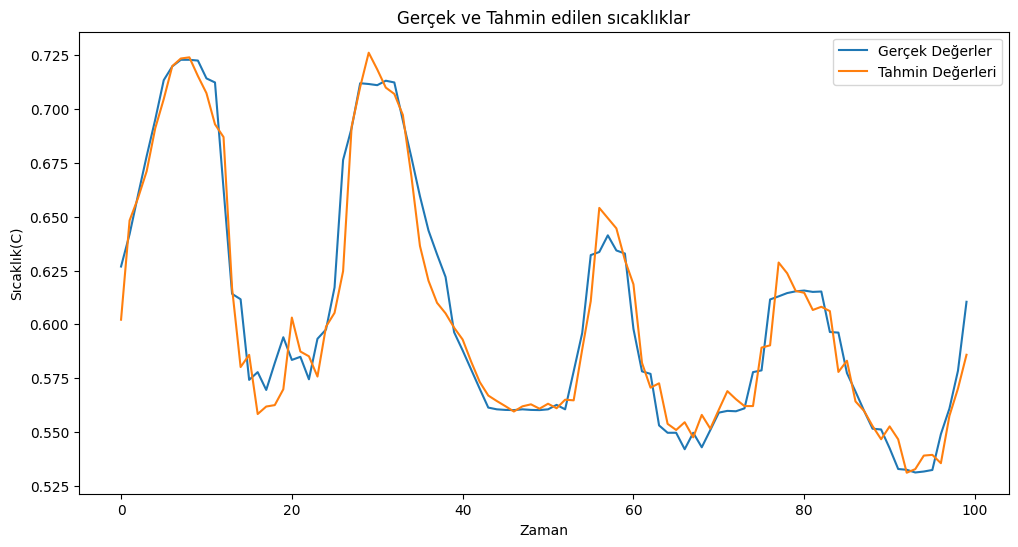

In [42]:
plt.figure(figsize=(12,6))
plt.plot(Y_test[:100],label='Gerçek Değerler')
plt.plot(y_pred[:100],label='Tahmin Değerleri')
plt.title("Gerçek ve Tahmin edilen sıcaklıklar")
plt.xlabel("Zaman")
plt.ylabel("Sıcaklık(C)")
plt.legend()
plt.show()

In [43]:
y_pred

array([[0.6021653 ],
       [0.64827454],
       [0.65879846],
       ...,
       [0.7064648 ],
       [0.67100084],
       [0.66678286]], dtype=float32)

In [44]:
y_pred = model.predict(X_test)


905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step


In [45]:



y_pred_extended = np.zeros((y_pred.shape[0], scaled_data.shape[1]))
y_pred_extended[:,0] = y_pred[:,0]  # sadece sıcaklık sütunu


y_pred_original = scaler.inverse_transform(y_pred_extended)[:,0]


In [47]:
y_test_extended = np.zeros((Y_test.shape[0], scaled_data.shape[1]))
y_test_extended[:,0] = Y_test  # testteki gerçek sıcaklık

y_test_original = scaler.inverse_transform(y_test_extended)[:,0]


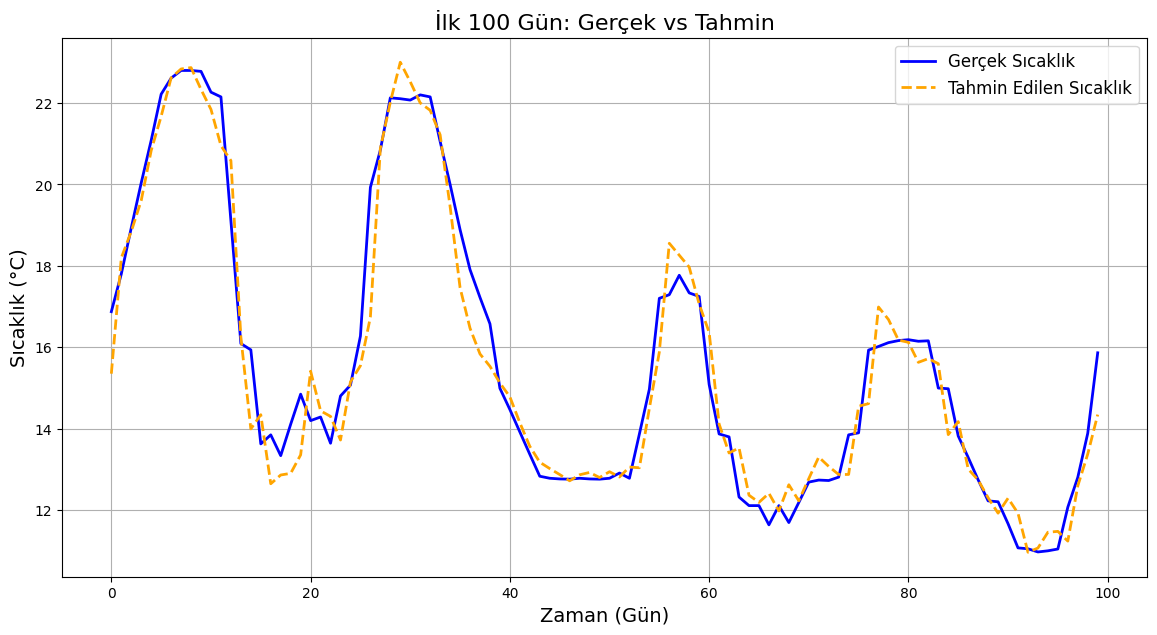

In [49]:

plt.figure(figsize=(14,7))
plt.plot(y_test_original[:100], label="Gerçek Sıcaklık", color='blue', linewidth=2)
plt.plot(y_pred_original[:100], label="Tahmin Edilen Sıcaklık", color='orange', linestyle='--', linewidth=2)
plt.title("İlk 100 Gün: Gerçek vs Tahmin", fontsize=16)
plt.xlabel("Zaman (Gün)", fontsize=14)
plt.ylabel("Sıcaklık (°C)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

